## Recommendation System for Retail Stores

In [63]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('Assignment-1_Data.csv', sep=';',parse_dates=['Date'])
df.head()

C:\Users\BhavyaSri\AppData\Local\Temp\ipykernel_14300\657107954.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Assignment-1_Data.csv', sep=';',parse_dates=['Date'])


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom


In [65]:
df['Price'] = df['Price'].str.replace(',', '.').astype('float64')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [67]:
df.isna().sum().sort_values(ascending=False)

CustomerID    134041
Itemname        1455
BillNo             0
Quantity           0
Date               0
Price              0
Country            0
dtype: int64

In [68]:
df['Total_Price'] = df.Quantity * df.Price

In [69]:
df.describe(include='all')

C:\Users\BhavyaSri\AppData\Local\Temp\ipykernel_14300\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total_Price
count,522064.0,520609,522064.000000,522064,522064.000000,388023.000000,522064,522064.000000
unique,21665.0,4185,NaN,19641,NaN,NaN,30,NaN
top,573585.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN
freq,1114.0,2269,NaN,1114,NaN,NaN,487622,NaN
first,NaN,NaN,NaN,2010-01-12 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.090435,NaN,3.826801,15316.931710,NaN,19.690633
std,NaN,NaN,161.110525,NaN,41.900599,1721.846964,NaN,273.068938
min,NaN,NaN,-9600.000000,NaN,-11062.060000,12346.000000,NaN,-11062.060000
25%,NaN,NaN,1.000000,NaN,1.250000,13950.000000,NaN,3.750000


In [70]:
# Print the number of unique countries in the 'Country' column
print("Number of unique countries:", df['Country'].nunique())

# Calculate and print the normalized value counts of the top 5 countries in the 'Country' column
print(df['Country'].value_counts(normalize=True)[:5])

Number of unique countries: 30
United Kingdom    0.934027
Germany           0.017320
France            0.016105
Spain             0.004760
Netherlands       0.004526
Name: Country, dtype: float64


In [71]:
df.drop('Country', axis=1, inplace=True)

In [72]:
df[df['BillNo'].str.isdigit() == False]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
288772,A563185,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,11062.06
288773,A563186,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,-11062.06
288774,A563187,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,-11062.06


In [73]:
df = df[df['Itemname'] != "Adjust bad debt"]

In [74]:
df['BillNo'].astype("int64")

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
522059    581587
522060    581587
522061    581587
522062    581587
522063    581587
Name: BillNo, Length: 522061, dtype: int64

In [75]:
df[df['Itemname'].isna()] ['Price'].sum()

0.0

In [76]:
df[df['Itemname'].isna()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
613,536414,NaN,56,2010-01-12 11:52:00,0.0,NaN,0.0
1937,536545,NaN,1,2010-01-12 14:32:00,0.0,NaN,0.0
1938,536546,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1939,536547,NaN,1,2010-01-12 14:33:00,0.0,NaN,0.0
1940,536549,NaN,1,2010-01-12 14:34:00,0.0,NaN,0.0
...,...,...,...,...,...,...,...
515623,581199,NaN,-2,2011-07-12 18:26:00,0.0,NaN,-0.0
515627,581203,NaN,15,2011-07-12 18:31:00,0.0,NaN,0.0
515633,581209,NaN,6,2011-07-12 18:35:00,0.0,NaN,0.0
517266,581234,NaN,27,2011-08-12 10:33:00,0.0,NaN,0.0


In [77]:
df = df[df['Itemname'].notna()]

# Print the number of unique items in the 'Itemname' column
print("Number of unique items:", df['Itemname'].nunique())

# Calculate and print the normalized value counts of the top 5 items in the 'Itemname' column
print(df['Itemname'].value_counts(normalize=True)[:5])

Number of unique items: 4184
WHITE HANGING HEART T-LIGHT HOLDER    0.004358
JUMBO BAG RED RETROSPOT               0.004009
REGENCY CAKESTAND 3 TIER              0.003707
PARTY BUNTING                         0.003221
LUNCH BAG RED RETROSPOT               0.003016
Name: Itemname, dtype: float64


In [78]:
df[df['Quantity'] < 1]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
7122,537032,?,-30,2010-03-12 16:50:00,0.0,NaN,-0.0
12926,537425,check,-20,2010-06-12 15:35:00,0.0,NaN,-0.0
12927,537426,check,-35,2010-06-12 15:36:00,0.0,NaN,-0.0
12973,537432,damages,-43,2010-06-12 16:10:00,0.0,NaN,-0.0
20844,538072,faulty,-13,2010-09-12 14:10:00,0.0,NaN,-0.0
...,...,...,...,...,...,...,...
515634,581210,check,-26,2011-07-12 18:36:00,0.0,NaN,-0.0
515636,581212,lost,-1050,2011-07-12 18:38:00,0.0,NaN,-0.0
515637,581213,check,-30,2011-07-12 18:38:00,0.0,NaN,-0.0
517209,581226,missing,-338,2011-08-12 09:56:00,0.0,NaN,-0.0


In [79]:
df = df[df['Quantity'] >= 1]

In [80]:
df[df['CustomerID'].isna()].sample(30)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
378813,570871,DOVE DECORATION PAINTED ZINC,6,2011-12-10 16:36:00,0.63,NaN,3.78
18183,537823,ANTIQUE SILVER TEA GLASS ENGRAVED,69,2010-08-12 14:25:00,1.25,NaN,86.25
314845,565617,PLASTERS IN TIN CIRCUS PARADE,1,2011-05-09 15:30:00,3.29,NaN,3.29
270743,561513,SET/6 PINK BUTTERFLY T-LIGHTS,1,2011-07-27 15:12:00,4.13,NaN,4.13
140360,548894,METAL SIGN EMPIRE TEA,1,2011-04-04 16:01:00,5.79,NaN,5.79
10754,537240,3D TRADITIONAL CHRISTMAS STICKERS,4,2010-06-12 10:08:00,2.51,NaN,10.04
483425,578844,JUMBO BAG TOYS,1,2011-11-25 16:14:00,4.13,NaN,4.13
122040,547089,ANTIQUE GLASS PEDESTAL BOWL,2,2011-03-20 16:10:00,3.75,NaN,7.50
268378,561214,GLASS JAR DAISY FRESH COTTON WOOL,1,2011-07-25 17:00:00,5.79,NaN,5.79
64914,541810,CARROT CHARLIE+LOLA COASTER SET,1,2011-01-21 15:00:00,5.79,NaN,5.79


In [81]:
zero_price_count = len(df[df['Price'] == 0])
print("Number of rows where price is zero:", zero_price_count)

# Counting the number of rows where the price is negative
negative_price_count = len(df[df['Price'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 583
Number of rows where price is negative: 0


In [82]:
df[df['Price'] == 0].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Total_Price
272552,561665,?,142,2011-07-28 16:55:00,0.0,NaN,0.0
415097,573751,check,10,2011-01-11 09:33:00,0.0,NaN,0.0
470650,577953,check,5,2011-11-22 12:09:00,0.0,NaN,0.0
101135,545176,FRENCH BLUE METAL DOOR SIGN 1,1,2011-02-28 14:19:00,0.0,NaN,0.0
14042,537534,DOORMAT 3 SMILEY CATS,1,2010-07-12 11:48:00,0.0,NaN,0.0
186894,553539,SPACEBOY TV DINNER TRAY,1,2011-05-17 15:27:00,0.0,NaN,0.0
378660,570860,found,44,2011-12-10 15:25:00,0.0,NaN,0.0
37921,539611,Found,53,2010-12-20 14:33:00,0.0,NaN,0.0
302708,564645,amazon,44,2011-08-26 13:38:00,0.0,NaN,0.0
14057,537534,PICNIC BASKET WICKER LARGE,2,2010-07-12 11:48:00,0.0,NaN,0.0


In [83]:
df = df[df['Price'] != 0]

Text(0.5, 0, 'Date (Month)')

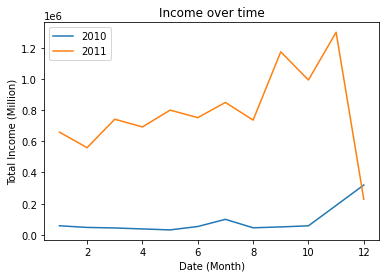

In [84]:
df[df["Date"].dt.year == 2010].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Grouping the data by month and summing the total price for the year 2011
df[df["Date"].dt.year == 2011].groupby(df["Date"].dt.month)["Total_Price"].sum().plot()

# Adding legend and plot labels
plt.legend(["2010", "2011"])
plt.title("Income over time")
plt.ylabel('Total Income (Million)')
plt.xlabel("Date (Month)")

In [85]:
df["Date"].max()

Timestamp('2011-12-10 17:19:00')

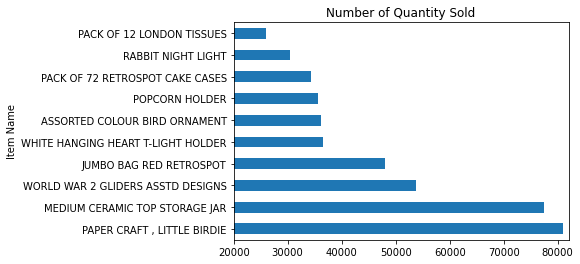

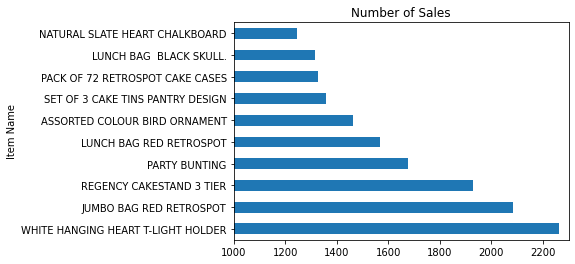

In [86]:
df.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='barh', title='Number of Quantity Sold')
plt.ylabel('Item Name')
plt.xlim(20000, 82000)
plt.show()

# Plotting the top 10 most sold products by count
df['Itemname'].value_counts(ascending=False)[:10].plot(kind='barh', title='Number of Sales')
plt.ylabel('Item Name')
plt.xlim(1000, 2300)
plt.show()

In [87]:
df2 = df

# Filter rows based on item occurrences
item_counts = df2['Itemname'].value_counts(ascending=False)
filtered_items = item_counts.loc[item_counts > 1].reset_index()['index']
df2 = df2[df2['Itemname'].isin(filtered_items)]

# Filter rows based on bill number occurrences
bill_counts = df2['BillNo'].value_counts(ascending=False)
filtered_bills = bill_counts.loc[bill_counts > 1].reset_index()['index']
df2 = df2[df2['BillNo'].isin(filtered_bills)]

In [88]:
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

In [89]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [90]:
import mlxtend
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Generate frequent itemsets with minimum support of 0.1 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.03,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)


# Print association rules
print("\nAssociation Rules:")
rules

Frequent Itemsets:
      support                                           itemsets
0    0.052444                           (6 RIBBONS RUSTIC CHARM)
1    0.033404                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.044427                      (60 TEATIME FAIRY CAKE CASES)
3    0.032958                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.053558                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
163  0.033014  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
164  0.030787  (LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...
165  0.030843   (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIGN)
166  0.030342  (PAPER CHAIN KIT 50'S CHRISTMAS, PAPER CHAIN K...
167  0.031678  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...

[168 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053558,0.057121,0.035241,0.658004,11.519562,0.032182,2.756991,0.964867
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.057121,0.053558,0.035241,0.616959,11.519562,0.032182,2.470865,0.968513
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.050328,0.041922,0.030286,0.601770,14.354570,0.028176,2.405841,0.979640
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041922,0.050328,0.030286,0.722444,14.354570,0.028176,3.421544,0.971044
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.054170,0.040641,0.033627,0.620761,15.274111,0.031425,2.529691,0.988052
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040641,0.054170,0.033627,0.827397,15.274111,0.031425,5.479809,0.974119
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.051164,0.113963,0.032290,0.631121,5.537954,0.026460,2.401971,0.863613
9,(JUMBO BAG APPLES),(JUMBO BAG RED RETROSPOT),0.053613,0.113963,0.030119,0.561786,4.929556,0.024009,2.021928,0.842300


In [91]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040641,0.054170,0.033627,0.827397,15.274111,0.031425,5.479809,0.974119
18,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.040641,0.056174,0.031678,0.779452,13.875637,0.029395,4.279459,0.967241
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.041922,0.050328,0.030286,0.722444,14.354570,0.028176,3.421544,0.971044
10,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
16,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS),0.044928,0.063245,0.030342,0.675341,10.678231,0.027500,2.885350,0.948988
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053558,0.057121,0.035241,0.658004,11.519562,0.032182,2.756991,0.964867
8,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.051164,0.113963,0.032290,0.631121,5.537954,0.026460,2.401971,0.863613
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.054170,0.040641,0.033627,0.620761,15.274111,0.031425,2.529691,0.988052


In [92]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.067309,0.113963,0.045596,0.677419,5.944214,0.037926,2.746715,0.891795
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.054170,0.056174,0.040641,0.750257,13.355912,0.037598,3.779187,0.978111
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.056174,0.054170,0.040641,0.723489,13.355912,0.037598,3.420583,0.980188
12,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.065583,0.113963,0.040140,0.612054,5.370650,0.032666,2.283921,0.870920
11,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.064859,0.113963,0.037635,0.580258,5.091639,0.030243,2.110907,0.859335
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.057121,0.053558,0.035241,0.616959,11.519562,0.032182,2.470865,0.968513
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.053558,0.057121,0.035241,0.658004,11.519562,0.032182,2.756991,0.964867
13,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.070037,0.085737,0.035185,0.502385,5.859633,0.029181,1.837290,0.891800
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040641,0.054170,0.033627,0.827397,15.274111,0.031425,5.479809,0.974119
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.054170,0.040641,0.033627,0.620761,15.274111,0.031425,2.529691,0.988052


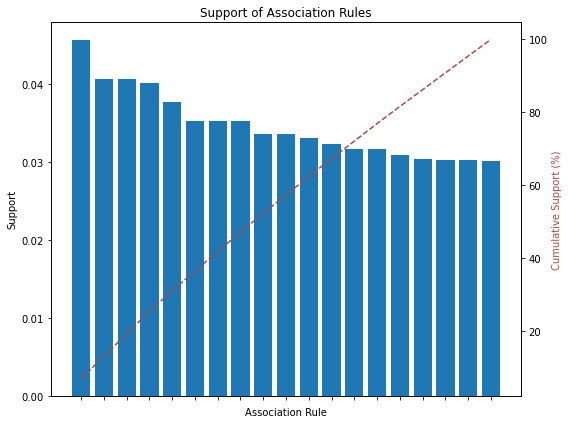

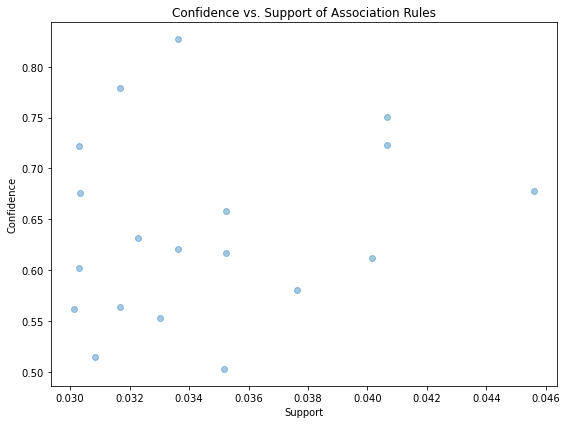

In [93]:
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center')
plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#AA4A44', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#AA4A44')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()


In [94]:
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'PINK REGENCY TEACUP AND SAUCER' also bought 'GREEN REGENCY TEACUP AND SAUCER'.
Customers who bought 'PINK REGENCY TEACUP AND SAUCER' also bought 'ROSES REGENCY TEACUP AND SAUCER'.
Customers who bought 'GREEN REGENCY TEACUP AND SAUCER' also bought 'ROSES REGENCY TEACUP AND SAUCER'.
Customers who bought 'ROSES REGENCY TEACUP AND SAUCER' also bought 'GREEN REGENCY TEACUP AND SAUCER'.
Customers who bought 'GARDENERS KNEELING PAD CUP OF TEA' also bought 'GARDENERS KNEELING PAD KEEP CALM'.

Upselling Recommendations:


In [95]:
top_upselling = upselling_rules.sort_values(['confidence', 'support'], ascending=False).drop_duplicates('antecedents')[:5]
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")